In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Conv1D, MaxPooling1D
from keras.models import load_model
import os #システム操作系
from pathlib import Path #ファイル操作系
import tensorflow as tf
import time
import datetime
import csv
import sys
import pandas as pd
sys.path.append(os.pardir)
from createdatas import createdata
from createdatas2 import createdata1, createdata3
from scipy.optimize import curve_fit    # フィッティング用
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE' #意味はわからん

date = str(datetime.date.today())

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

Using TensorFlow backend.


現在時刻： 2020-11-20 17:10:39.535185


In [ ]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)
# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, f'savefig{NOISE}%')
print('保存フォルダ：', save_folder)
# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

In [2]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ
plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離
plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [ ]:
train_num = 10000 #訓練データの数
test_num = 1000 #テストデータの数
data_size = 100 #配列の大きさ

x_train = np.zeros((train_num,data_size))
y_train = np.zeros((train_num,data_size))
t_train = np.zeros((train_num, 3))
ty_train = np.zeros((train_num, 3))
x_test = np.zeros((test_num,data_size))
y_test = np.zeros((test_num,data_size))
t_test = np.zeros((test_num, 3))
ty = np.zeros((test_num, 3))

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/savefig80%
経過時間:54.49428391456604[sec]
平均絶対誤差: 0.310308 ± 0.231532


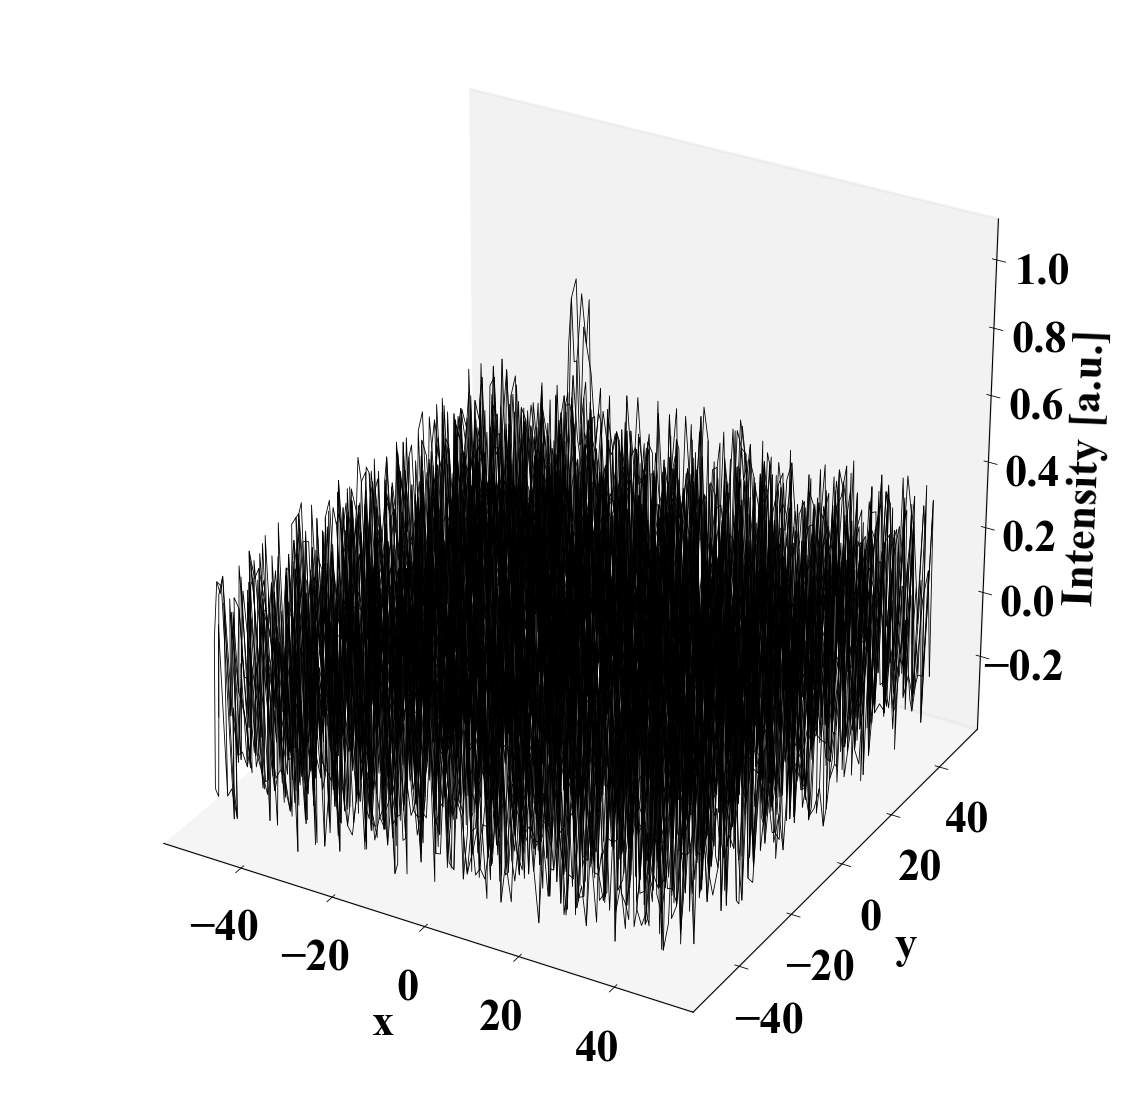

経過時間:7.305065870285034[sec]
平均絶対誤差: 0.319429 ± 0.247668


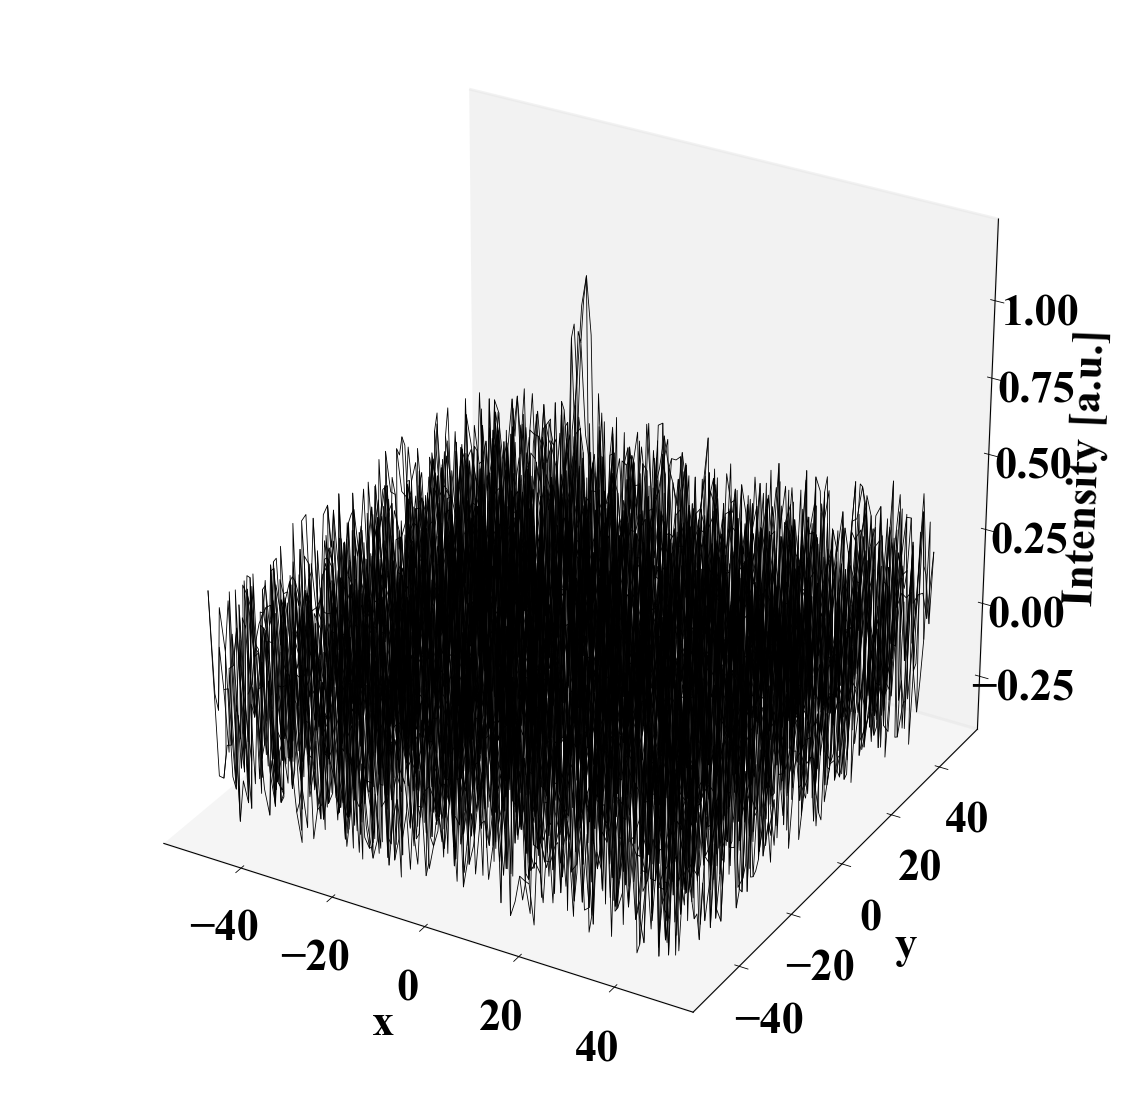

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100, 100)          200       
_________________________________________________________________
dense_7 (Dense)              (None, 100, 100)          10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100, 50)           5050      
_________________________________________________________________
dense_9 (Dense)              (None, 100, 10)           510       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 10)           0         
_________________________________________________________________
dense_10 (Dense)             (None, 100, 3)            33        
Total params: 15,893
Trainable params: 15,893
Non-trainable params: 0
__________________________________________________

ValueError: Error when checking input: expected dense_6_input to have 3 dimensions, but got array with shape (10000, 100)

In [5]:
#学習
NOISE = 80

#訓練データの生成
fit_param_x = np.zeros((train_num, 4))
fit_param_y = np.zeros((train_num, 4))

createdata1(train_num, NOISE, data_size, x_train, y_train, t_train, ty_train, fit_param_x, fit_param_y)

#テストデータの生成
fit_param_x = np.zeros((test_num, 4))
fit_param_y = np.zeros((test_num, 4))

createdata1(test_num, NOISE, data_size, x_test, y_test, t_test, ty, fit_param_x, fit_param_y)
#CNN3の実装
batch_size = 200  # 訓練データを200ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

#データ形式の変更(シーケンス長, パラメータ数)
#train_x = x_train.reshape(-1, 100, 1)
train_x = x_train
train_t = t_train
#test_x = x_test.reshape(-1, 100, 1)
test_x = x_test
test_t = t_test

#レイヤー構造
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(100,1),kernel_initializer="he_normal"))
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu', kernel_initializer="he_normal"))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu', kernel_initializer="he_normal"))

model.summary()

model.compile(loss='mse',
 optimizer='adam',
 metrics=['mae'])

#callbacks = [keras.callbacks.TensorBoard(log_dir='./logs',
#                            histogram_freq=1, 
#                            batch_size=batch_size, 
#                            write_graph=True, 
#                            write_grads=True)]

history = model.fit(train_x, train_t,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(test_x, test_t))

score = model.evaluate(test_x, test_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.h5'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
model.save(save_file)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#historyの保存
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)
save_data = np.array((epochs, mae, val_mae, loss, val_loss))
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.json'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
hist_df = pd.DataFrame(history.history) 
with open(save_file, mode='w') as f:
    hist_df.to_json(f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#損失関数の推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_loss.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, loss,  color="black", label = 'Train')
ax.scatter(epochs, val_loss,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('Loss',fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#maeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_mae.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, mae,  color="black", label = 'Train')
ax.scatter(epochs, val_mae,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('MAE',fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 33        
Total params: 11,143
Trainable params: 11,143
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 240us/

/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-19_15-06_80_loss.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-19_15-06_80_loss.svg


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-19_15-06_80_mae.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-19_15-06_80_mae.svg


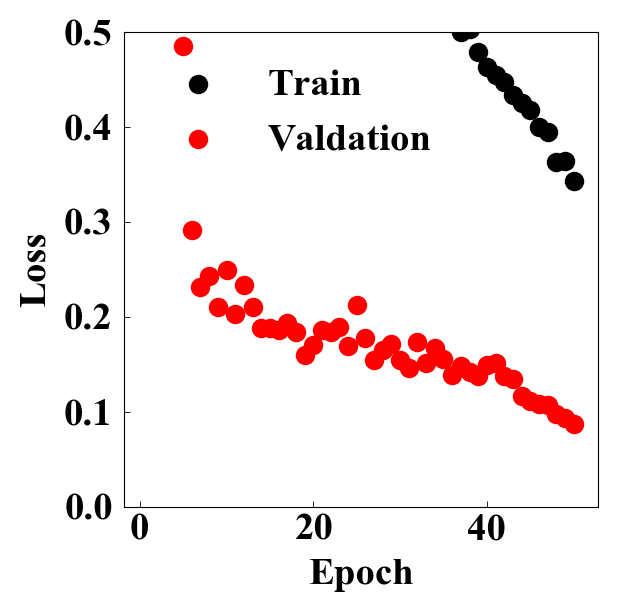

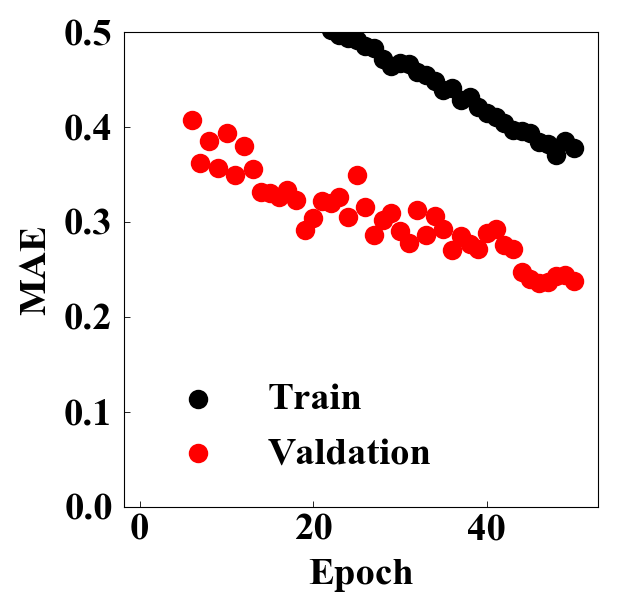

In [9]:
#全結合層のみの実装
batch_size = 200  # 訓練データを128ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

# モデルの作成
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3))

model.summary()

model.compile(loss='mse',
 optimizer=RMSprop(),
 metrics=['mae'])



# 学習は、scrkit-learnと同様fitで記述できる
history = model.fit(x_train, t_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(x_test, t_test))

# 評価はevaluateで行う
score = model.evaluate(x_test, t_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#modelの保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.h5'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
model.save(save_file)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#historyの保存
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)
save_data = np.array((epochs, mae, val_mae, loss, val_loss))
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.json'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
hist_df = pd.DataFrame(history.history) 
with open(save_file, mode='w') as f:
    hist_df.to_json(f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#損失関数の推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_loss.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, loss,  color="black", label = 'Train')
ax.scatter(epochs, val_loss,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('Loss',fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#maeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_mae.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, mae,  color="black", label = 'Train')
ax.scatter(epochs, val_mae,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('MAE',fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [3]:
#構造確認用
model = Sequential()
model.add(Conv1D(50, 3, padding='same', input_shape=(100, 1), activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(5, padding='same'))
model.add(Conv1D(10, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_initializer="he_normal"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 50)           200       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 50)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 50)            7550      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 10)            1510      
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)             

In [5]:
#元の構造
model = Sequential()
model.add(Conv1D(100, 3, padding='same', input_shape=(100, 1), activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu', kernel_initializer="he_normal"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 100)          400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 50)            15050     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 25, 50)            7550      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)             

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/savefig80%
経過時間:39.07634735107422[sec]
平均絶対誤差: 0.308522 ± 0.234452


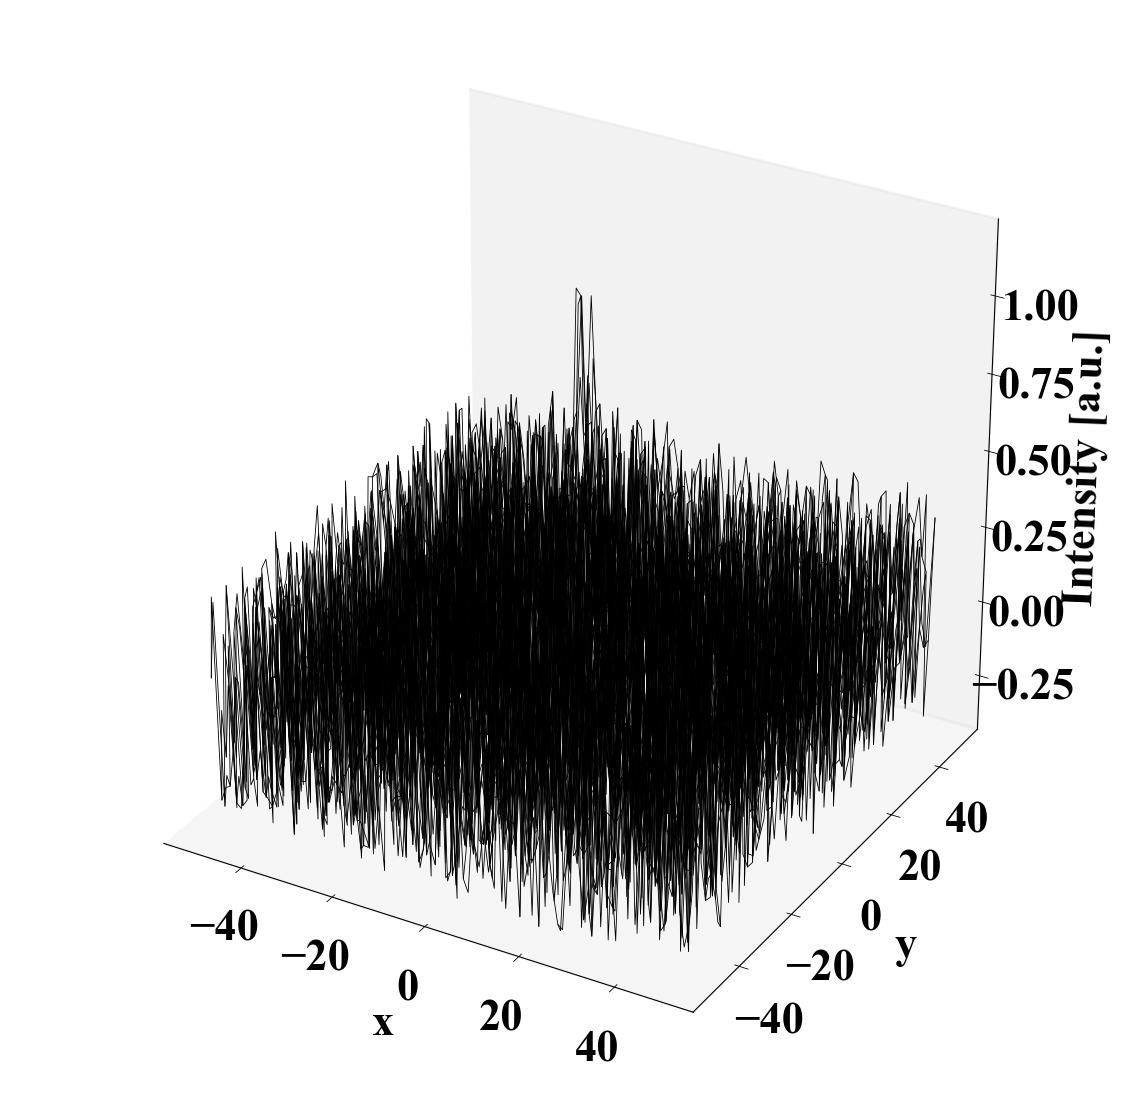

経過時間:4.304067850112915[sec]
平均絶対誤差: 0.304406 ± 0.244530


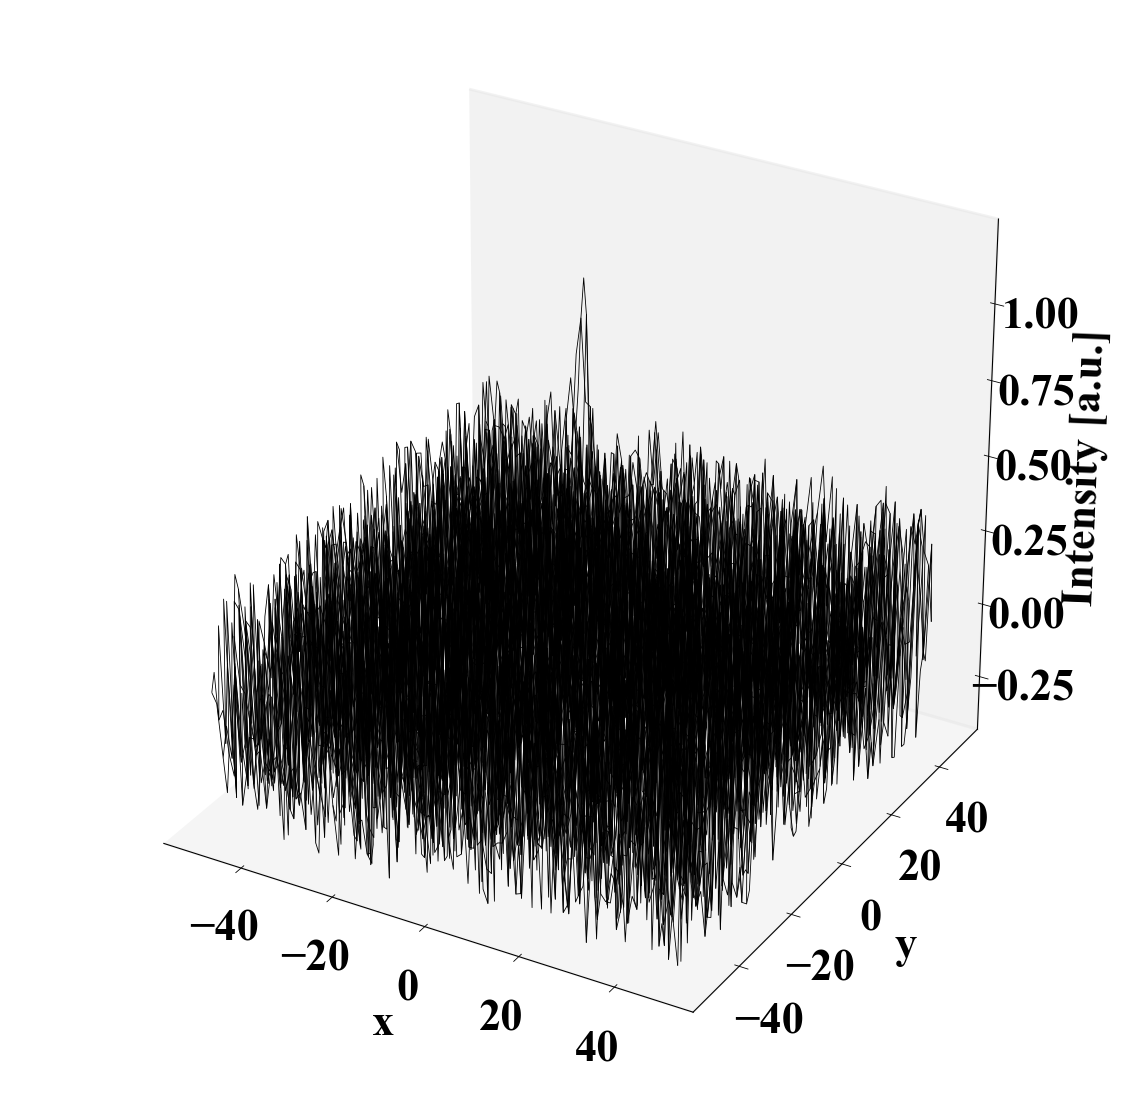


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 50)           200       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 50)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 50)            7550      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 10)            1510      
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)             

/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-20_17-24_80_loss.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-20_17-24_80_loss.svg


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-20_17-24_80_mae.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-20_17-24_80_mae.svg


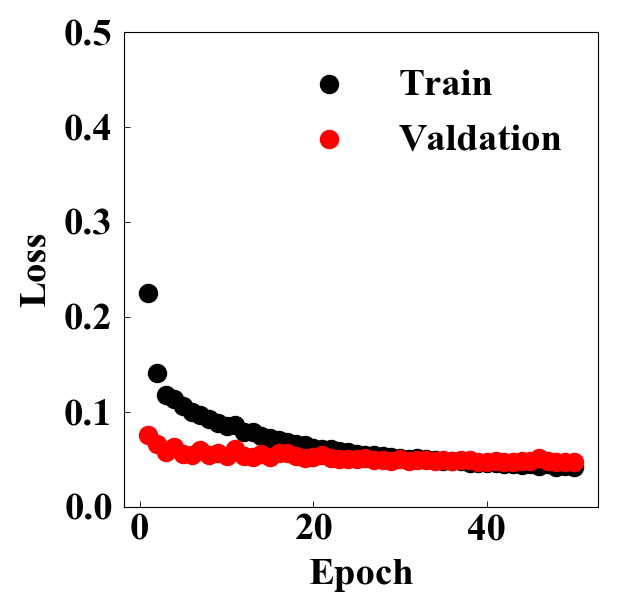

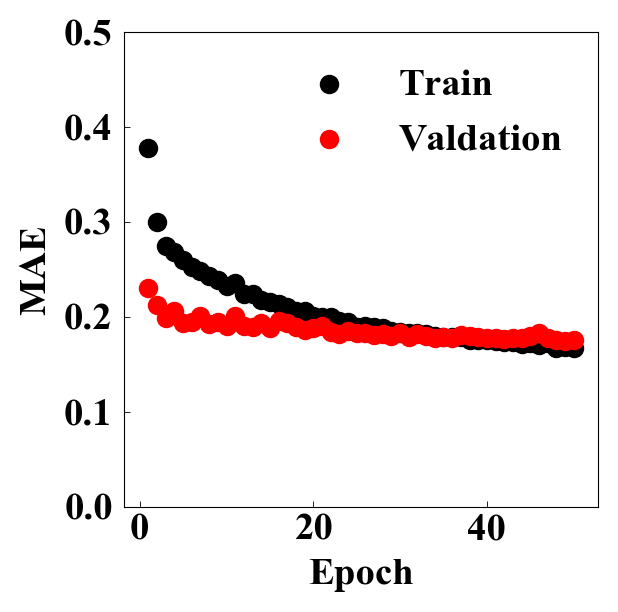

In [3]:
#出力１
NOISE = 80
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)
# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, f'savefig{NOISE}%')
print('保存フォルダ：', save_folder)
# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

#訓練データの生成
fit_param_x = np.zeros((train_num, 4))
fit_param_y = np.zeros((train_num, 4))

createdata3(train_num, NOISE, data_size, x_train, y_train, t_train, ty_train, fit_param_x, fit_param_y)

#テストデータの生成
fit_param_x = np.zeros((test_num, 4))
fit_param_y = np.zeros((test_num, 4))

createdata3(test_num, NOISE, data_size, x_test, y_test, t_test, ty, fit_param_x, fit_param_y)

t_train = t_train.T[1].flatten()
t_test = t_test.T[1].flatten()
#まともなCNNの実装
batch_size = 200  # 訓練データを200ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

#データ形式の変更(シーケンス長, パラメータ数)
train_x = x_train.reshape(-1, 100, 1)
train_t = t_train
test_x = x_test.reshape(-1, 100, 1)
test_t = t_test

model = Sequential()
model.add(Conv1D(50, 3, padding='same', input_shape=(100, 1), activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(5, padding='same'))
model.add(Conv1D(10, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu', kernel_initializer="he_normal"))

model.summary()

model.compile(loss='mse',
 optimizer='adam',
 metrics=['mae'])

history = model.fit(train_x, train_t,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(test_x, test_t))

score = model.evaluate(test_x, test_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.h5'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
model.save(save_file)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#historyの保存
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)
save_data = np.array((epochs, mae, val_mae, loss, val_loss))
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.json'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
hist_df = pd.DataFrame(history.history) 
with open(save_file, mode='w') as f:
    hist_df.to_json(f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#損失関数の推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_loss.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, loss,  color="black", label = 'Train')
ax.scatter(epochs, val_loss,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('Loss',fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#maeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_mae.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, mae,  color="black", label = 'Train')
ax.scatter(epochs, val_mae,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('MAE',fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2020-11-16 17:28:41.935707
保存ファイル名： 2020-11-16_17-28_noise80.h5
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-16_17-28_noise80.h5
現在時刻： 2020-11-16 17:28:42.112791
保存ファイル名： 2020-11-16_17-28_noise80.json
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-16_17-28_noise80.json


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-16_17-28_80_loss.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-16_17-28_80_loss.svg


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-16_17-28_80_mae.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-16_17-28_80_mae.svg


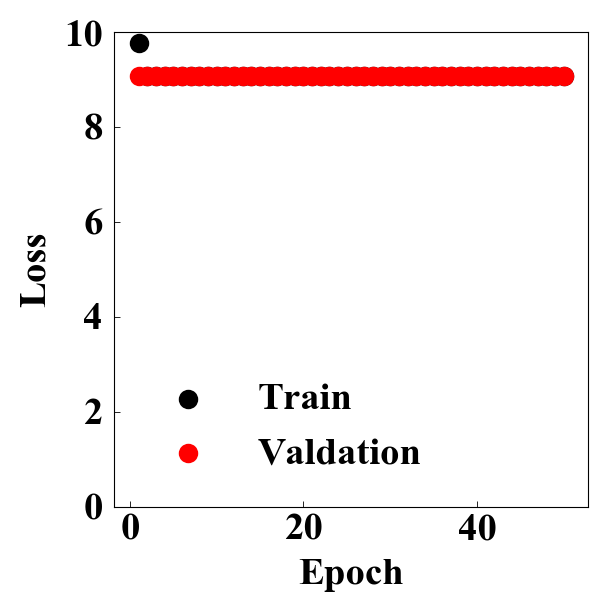

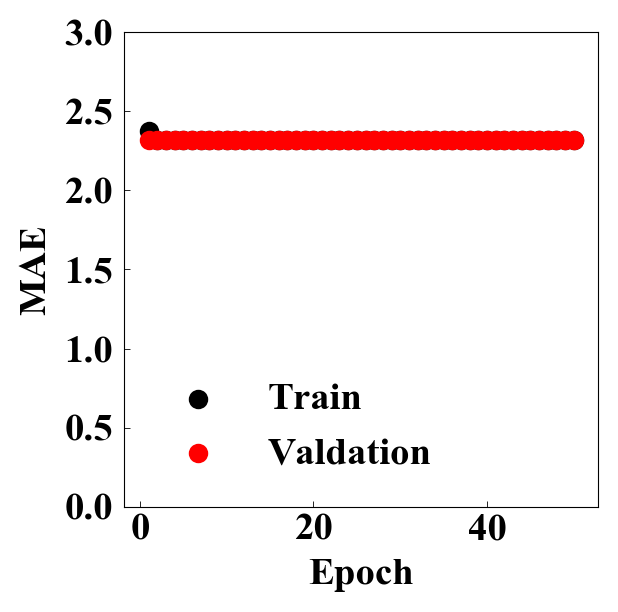

In [6]:
#保存確認用
#modelの保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.h5'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
model.save(save_file)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#historyの保存
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)
save_data = np.array((epochs, mae, val_mae, loss, val_loss))
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_noise{NOISE}.json'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
hist_df = pd.DataFrame(history.history) 
with open(save_file, mode='w') as f:
    hist_df.to_json(f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#損失関数の推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_loss.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, loss,  color="black", label = 'Train')
ax.scatter(epochs, val_loss,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('Loss',fontsize=14)
ax.set_ylim(0, 10.0)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#maeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_mae.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(epochs, mae,  color="black", label = 'Train')
ax.scatter(epochs, val_mae,  color="red", label = 'Valdation')
ax.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('MAE',fontsize=14)
ax.set_ylim(0, 3.0)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)